# Assignment 05
# Due: Monday July 8th, 2024, 3:59 PM
# Late submissions until July 10th, 3:59 PM
## Instructions:
1. Once the notebook is completed, export to .py file.  Submit both the notebook and the .py file.  To do this, click export at the top of the notebook or ctrl + shift + p at the top of the notebook and type in export.  Export to python file should show up as a search result.  Also:
    - Ensure that your .py file is an exact replica of your .ipynb file.  
    - Ensure your .py and .ipynb files run successfully without any errors.  You should be able to click `Run All` in VS Code and run the notebook without error before converting to a .py file.  When completed, you should be able to run the .py file from the terminal or command prompt.
2. DO NOT submit the data from the assignment and keep your data file and python file in the same directory. Do not use your local directory path to read files (e.g., avoid using paths like C:/your/directory/file.csv).  Just read in the file directly as if though it was in the same directory as your .ipynb file.  DO NOT CHANGE THE NAME OF THE FILE....
3. Whenever we ask to .head(10) the results or print out a value, please use `print()` so for example `print(df.head(10))`. Print only the answers to the questions that have been asked.  Do not print the head of a dataset unless explicitly asked. 
4. Whenever displaying a graph use `plt.show()`
5. For theoretical answers/short answers, please use print() (e.g., print("your answer")).
6. Wherever we have code displayed to print out values, use that code as a template to print out your output.  For example, if we give you `print(f'Threshold for best accuracy: {}')` please use code in this style to print out your output.  For some questions, this is only a template as we expect you to print out multiple answers (For example....Fit a linear regression model to each of the 5 features INDIVUDALLY and print out the slope and intercept for each. (Don't forget train/test split) requires you use the template for each feature)
7. Do not include pip install commands in your code. You can assume that all required libraries are already installed.

# Assignment 5: SVM With Real Estate Data

## Instructions:

For this assignment we are going to use the northeast_realestate.parquet file that we did in the first assignment.  We will basically:

1. Complete some basic EDA
2. Filter out bad data
3. Create a train test split
4. Fit an SVM and a Logistic Regression to compare
5. Use GridSearchCV to find the best parameters for an SVM and analyze the best model

1. Import data and packages here.  Import parquet file using `pd.read_parquet("northeast_realestate.parquet")`.  Print out the head of the dataframe.

In [35]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_parquet('northeast_realestate.parquet', engine='pyarrow')
print(data.head())

      price  bed  bath  acre_lot                  street          city  \
0  225000.0  3.0   1.0      3.93            326 River Rd    Willington   
1  579900.0  4.0   3.0      2.34           32 Heather Ln      Coventry   
2   65000.0  1.0   1.0       NaN  63 Schofield Rd Apt 34    Willington   
3  215000.0  2.0   1.0      0.91              353 Rye St  East Windsor   
4  144900.0  2.0   1.0      0.36         24 Worcester Rd        Vernon   

         state  zip_code  house_size  sold_date  
0  Connecticut    6279.0      1572.0       None  
1  Connecticut    6238.0      3320.0   6/1/2021  
2  Connecticut    6279.0       680.0  8/16/2019  
3  Connecticut    6016.0       960.0   6/6/2012  
4  Connecticut    6066.0       860.0   9/2/2016  


2. Print out the shape of the dataframe

In [ ]:
print(data.shape)


3. Create a new feature like we did in class called `'citystate'` that is a combination of the city and state separated by an underscore.  Print out the head of this new column.

In [8]:
data['citystate'] = data['city']+'_'+data['state']
print(data['citystate'].head())

0      Willington_Connecticut
1        Coventry_Connecticut
2      Willington_Connecticut
3    East Windsor_Connecticut
4          Vernon_Connecticut
Name: citystate, dtype: object


4. Filter only on 'Staten Island_New York','Worcester_Massachusetts','Manhattan_New York' and 'Portland_Maine' and print out the shape of the resultant data frame

In [18]:
data['citystate']

0            Willington_Connecticut
1              Coventry_Connecticut
2            Willington_Connecticut
3          East Windsor_Connecticut
4                Vernon_Connecticut
                    ...            
517500           Chappaqua_New York
517501              Monroe_New York
517502             Congers_New York
517503      Valley Cottage_New York
517504    Croton On Hudson_New York
Name: citystate, Length: 517505, dtype: object

In [ ]:
filtered_data = data[['Staten Island_New York','Worcester_Massachusetts','Manhattan_New York','Portland_Maine']]
print(filtered_data.shape)

# EDA

5. For each column in this new data frame, print out the number of null values, the number of not null values and the percent of nulls in each column. You can either put all values in a data frame and print it out or loop through the columns and print them out separately

In [30]:
data.isnull().sum()

price              6
bed            72889
bath           55600
acre_lot      192738
street          1899
city               5
state              0
zip_code          22
house_size    123577
sold_date     263268
citystate          5
dtype: int64

In [31]:
for c, v in data.items():
    print((f'Column: {c}\n Number null: {v.isna().sum()}\n Number not null: {~v.isnull().sum()}\n Proportion null: {~v.isnull().sum()/v.isnull().sum()}'))

Column: price
 Number null: 6
 Number not null: -7
 Proportion null: -1.1666666666666667
Column: bed
 Number null: 72889
 Number not null: -72890
 Proportion null: -1.0000137194912813
Column: bath
 Number null: 55600
 Number not null: -55601
 Proportion null: -1.0000179856115108
Column: acre_lot
 Number null: 192738
 Number not null: -192739
 Proportion null: -1.0000051883904575
Column: street
 Number null: 1899
 Number not null: -1900
 Proportion null: -1.0005265929436546
Column: city
 Number null: 5
 Number not null: -6
 Proportion null: -1.2
Column: state
 Number null: 0
 Number not null: -1
 Proportion null: -inf
Column: zip_code
 Number null: 22
 Number not null: -23
 Proportion null: -1.0454545454545454
Column: house_size
 Number null: 123577
 Number not null: -123578
 Proportion null: -1.000008092120702
Column: sold_date
 Number null: 263268
 Number not null: -263269
 Proportion null: -1.000003798410745
Column: citystate
 Number null: 5
 Number not null: -6
 Proportion null: -1.

/var/folders/sb/73j4d15s4k34y66s1tpvsgx80000gn/T/ipykernel_6388/3930679197.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  print((f'Column: {c}\n Number null: {v.isna().sum()}\n Number not null: {~v.isnull().sum()}\n Proportion null: {~v.isnull().sum()/v.isnull().sum()}'))


6. Select only the 'price','bed','bath','house_size' and 'citystate' variables and drop the nulls and drop the duplicates.  Print the head of the dataset.

In [32]:
dropnull_duplicate = data[['price','bed','bath','house_size','citystate']].dropna().drop_duplicates()
print(dropnull_duplicate.head())

      price  bed  bath  house_size                 citystate
0  225000.0  3.0   1.0      1572.0    Willington_Connecticut
1  579900.0  4.0   3.0      3320.0      Coventry_Connecticut
2   65000.0  1.0   1.0       680.0    Willington_Connecticut
3  215000.0  2.0   1.0       960.0  East Windsor_Connecticut
4  144900.0  2.0   1.0       860.0        Vernon_Connecticut


7. Print the shape of this new dataframe

In [33]:
print(dropnull_duplicate.shape)

(40960, 5)


8. Create a pair scatter plot of all the numeric variables (all the variables except the citystate).  I think we learned how to do this in `03_data_prep_and_preprocessing_notebook_02.ipynb`

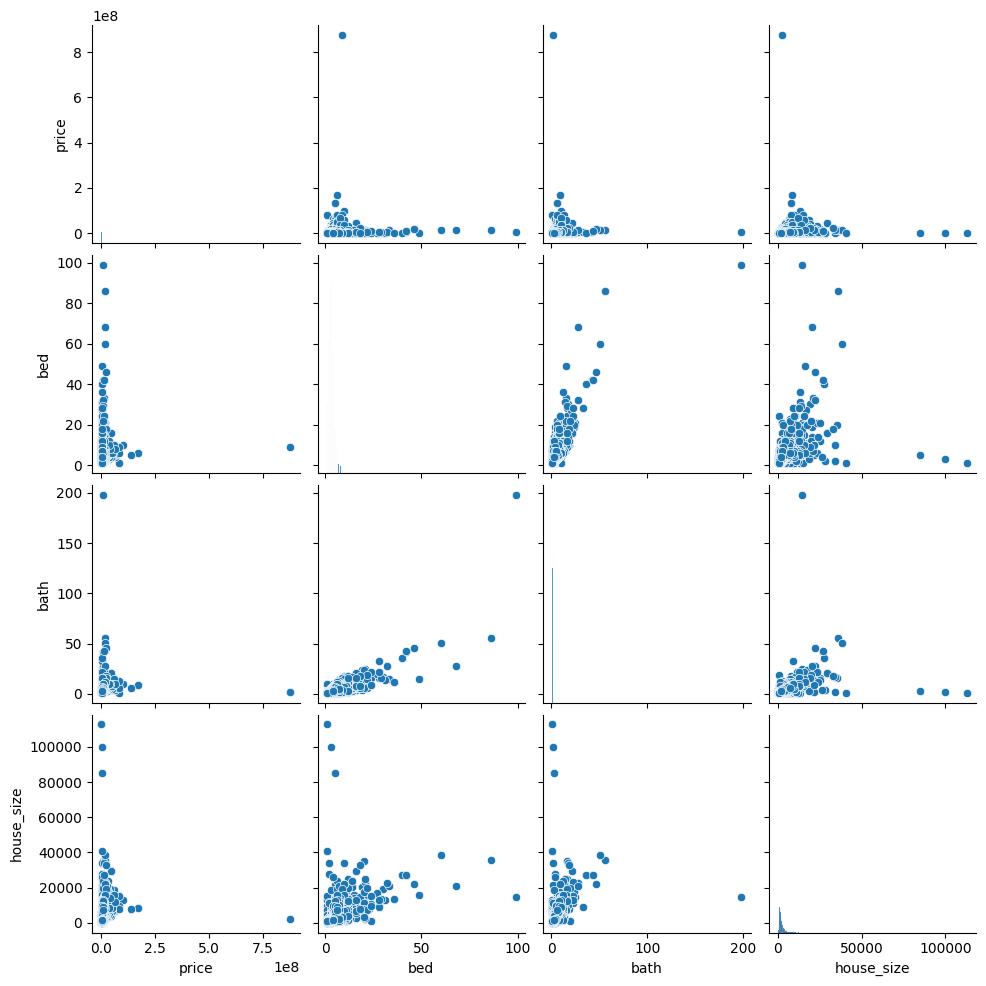

In [39]:
sns.pairplot(dropnull_duplicate.drop(columns='citystate'))
plt.show()

9. Which variables seem to be correlated with eachother?

In [ ]:
print("""Number of bed and bath as well as house size and bed seems to have the highest correlation""")

10. Create two column plots displaying the count of observations for all values of bed and bath

In [ ]:
plt.show()

In [ ]:
plt.show()

11. Print out the row(s) for the properties with the highest number of beds.  Do any bed values seem like outliers?  Does the price seem to match your intuition about the number of beds?

In [ ]:
print(f'Row with highest number of beds:\n{}')
print("""Your answer here""")

12. Create a histogram of the price

In [ ]:
plt.show()

13. Is the price skewed?  What type of transformation (see `03_data_prep_and_preprocessing_notebook_02.ipynb`) should we use to transform a value with such extreme values?

In [ ]:
print("""Your answer here""")

14. Plot a histogram of the transformed price.  Does it look more normal?

In [ ]:
plt.show()
print("""Your answer here""")

15. Do the same for house_size. Plot the histogram of house_size

In [ ]:
plt.show()

16. Should house_size be transformed?

In [ ]:
print("""Your answer here""")

17. Plot a histogram of transformed house_size.  Does is appear more normal?

In [ ]:
plt.show()
print("""Your answer here""")

18. Create a correlation matrix for the numeric variables.   Use a heatmap and the "flare" color palette

In [ ]:
plt.show()

19.  What variables are most correlated?  If we were to complete PCA in this assignment (which we aren't), which X variables would be good candidates for combining for PCA?

In [ ]:
print("""Your answer here""")

20.  Calculate and print out the percentage of rows by citystate.

In [ ]:
print()

21. Is the data set balanced?  Which citystate combination occurs the most?  The least?

In [ ]:
print("""Your answer here""")

22. Create your X and y variables.  Transform house_size and price the way we did above.  Your y, or target variable, should be citystate.

23. Create a train test split.  Use 0.20 test size and random_state = 42.  Print the shape of your x train, x test, y train and y test data sets

24. Print out the proportion of observations by citystate.

In [ ]:
print()

25.  Does the distribution of values match the overall data set?

In [ ]:
print("""Your answer here""")

26. Override your train test split, except stratify by the y variable

27. Print out the distribution of y values.

In [ ]:
print()

28.  Is the distribution of your y values closer to the original dataset?

In [ ]:
print("""Your answer here""")

29. Scale your training data using `fit_transform` and then use `transform` to transform the test data as well using the same scaler (don't call `fit_transform again`, just `fit`).  Print out the head of your scaled X data.

In [ ]:
print()

30. Create a separate scatter plot of your training data (or use a FacetGrid and use col='citystate') for each citystate with price on the x axis and house_size on the y.

In [ ]:
plt.show()

31.  Create a single scatter plot with price on the x and house_size on the y.  Color the observations by citystate and add a legend.

In [ ]:
plt.show()

32. Which citystates seem like they might be the most easy to categorize or separate using these two variables, from what you can see in your graphs.  Which ones seem like they will be more difficult to separate?

In [ ]:
print("""Your answer here""")

33. Fit a logistic regression and print out the accuracy_score and f1_score (use the macro average) for the training and testing data

In [ ]:
print(metrics.accuracy_score(),
      metrics.f1_score())


print(metrics.accuracy_score(),
      metrics.f1_score())

34. Do the same, except with a SVC.  Use C=1 and gamma=1.

In [ ]:
print(metrics.accuracy_score(),
      metrics.f1_score())


print(metrics.accuracy_score(),
      metrics.f1_score())

35. Which model seems to perform better on the test set?

In [ ]:
print("""Your answer here""")

36. Do grid search to find the best hyperparameters

- Use KFold and n_splits=5 and a random_state of 7.  Set shuffle=True
- Use the params dictionary given (you should calculate 175 models)
- Use your scaled data
- Print out the best score and best parameters.  Look at the sklearn documentation for how to select the best score and parameters from the grid search.

In [ ]:

params = {'C': [0.1, 1, 10, 100, 1000, 10000, 20000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

print(f'Best Score: {}')
print(f'Best Parameters: {}')

37. Do the same as above, except use your unscaled data.  Print out the best score and parameters

In [ ]:

params = {'C': [0.1, 1, 10, 100, 1000, 10000, 20000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

print(f'Best Score: {}')
print(f'Best Parameters: {}')

38.  Which combination of data and parameters (scaled vs unscaled, gamma, C) seem to produce the best model?

In [ ]:
print("""Your answer here""")

39. Fit a final model using your best parameters above on the scaled data.  Print out the accuracy_score and f1_score (use macro average) for the training and test data.

In [ ]:
print(metrics.accuracy_score(),
      metrics.f1_score())


print(metrics.accuracy_score(),
      metrics.f1_score())

40. Is the f1 score for the test set (from the previous question, question 39) close to the f1 score you calculated for your best model above (question 36) through cross validation?  Said another way, would you say that your f1 score found in the grid search (question 36) is a good approximation of your actual f1 test score (from the previous question, question 39)?

In [ ]:
print("""Your answer here""")

41. Plot a confusion matrix using `metrics.ConfusionMatrixDisplay.from_predictions`.  Use `normalize='true'` and `values_format=".0%"`.

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(??,
                                                ??,
                                                normalize='true',
                                                values_format=".0%",
                                                xticks_rotation='vertical')
plt.show()

42. Where does there seem to be the most confusion (i.e. which classes seem to be confused for one another)?  Does this make sense given your scatter plots in questions 30-31?

In [ ]:
print("""Your answer here""")

43. Use `metrics.classification_report` on the test data.  Print out the classification report.

In [ ]:
print(metrics.classification_report())

44. What do your f1 scores tell you about which categories are easiest to classify and which are hardest?

In [ ]:
print("""Your answer here""")

45. What recommendations would you give someone to improve their model

In [ ]:
print("""Your answer here""")

# Bonus (10 Points)

46. Use a label encoder on the y variable train data to encode as numbers instead of strings.  Use the same label encoder on the test data to transform that data as well.


47. Fit a model on only price and house_size.  Use the scaled data and the parameters from your best model above (use an SVC, not Logistic Regression) and the newly encoded y train as your y variable


48. Print out the training and test accuracy and f1 scores (use macro average).  


In [ ]:
print(metrics.accuracy_score(),
      metrics.f1_score())


print(metrics.accuracy_score(),
      metrics.f1_score())

49. How does the test accuracy and f1_scores seem to compare to our model above that had bed and bath in them?


In [ ]:
print("""Your answer here""")

50. Plot a confusion matrix with `normalize='true'` and `values_format=".0%"`.  Create a title indicating which labels from the label encoder correspond to which string


In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(??,
                                                ??,
                                                normalize='true',
                                                values_format=".0%",
                                                xticks_rotation='vertical')
plt.show()

51. Where does the confusion seem to be?


In [ ]:
print("""Your answer here""")

52. Plot the decision boundary with only scatter plot for Manhattan and Worchester


In [ ]:
plt.show()

53. Plot the decision boundary with scatter plot for all four categories

In [ ]:
plt.show()

54. Do your decision boundaries make sense?

In [ ]:
print("""Your answer here""")